In [1]:
!ls './Reports/gender/b5post_pt'

confusion_matrix.npy  expected.numpy.npy  predicted.numpy.npy	     report.csv
confusion_matrix.pdf  histories.pkl	  predicted_proba.numpy.npy


In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [3]:

def plot_history(history):


    loss_list = [s for s in history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.keys() if 'loss' in s and 'val' in s]

    acc_list = [s for s in history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.keys() if 'acc' in s and 'val' in s]

    if len(loss_list) == 0:
        print('Loss is missing in history')

    ## As loss always exists
    epochs = range(1,len(history[loss_list[0]]) + 1)
    
    plt.figure().set_size_inches(12, 4)
    plt.subplot(1,2,1)
    ## Loss    
    for l in loss_list:
        plt.plot(epochs, history[l], 'g', label='Erro de treinamento (' + str(str(format(history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history[l], 'b', label='Erro de validação (' + str(str(format(history[l][-1],'.5f'))+')'))

    plt.title('Erro')
    plt.xlabel('Épocas')
    plt.ylabel('Erro')
    plt.legend()
    
    #plt.gcf().clear()

    ## F2
    plt.subplot(1,2,2)    
    for l in acc_list:
        plt.plot(epochs, history[l], 'g', label='Acurácia de treinamento (' + str(format(history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history[l], 'b', label='Acurácia de validação (' + str(format(history[l][-1],'.5f'))+')')

    plt.title('Acurácia')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.tight_layout()

    plt.show()


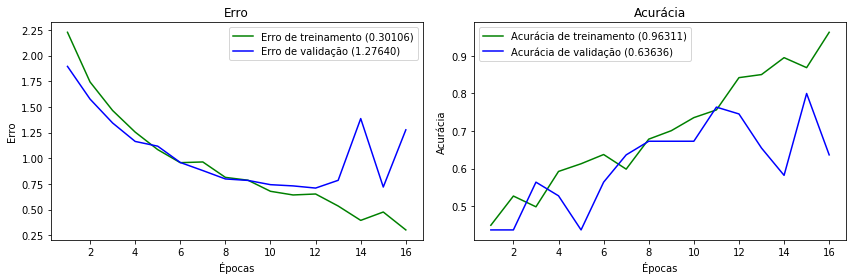

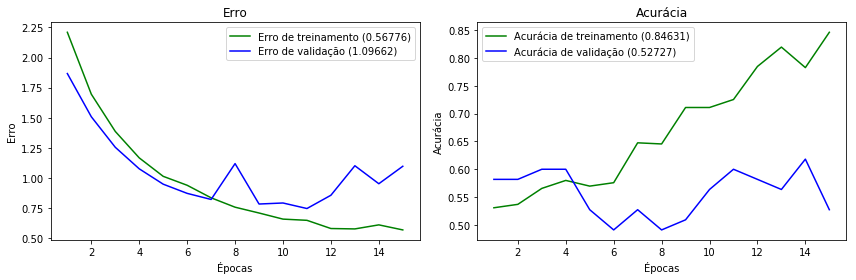

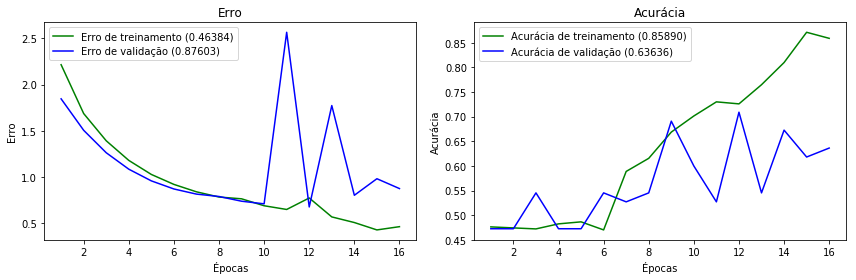

In [4]:
with open('./Reports/gender/b5post_pt/histories.pkl','rb') as f:
    h = pickle.load(f)
    histories = np.array(h)
    plot_history(histories[0])
    plot_history(histories[1])
    plot_history(histories[2])

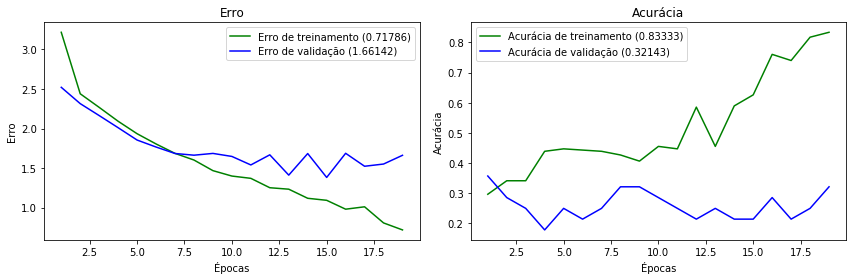

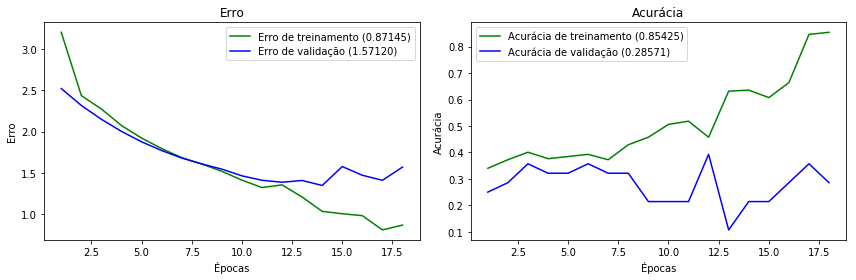

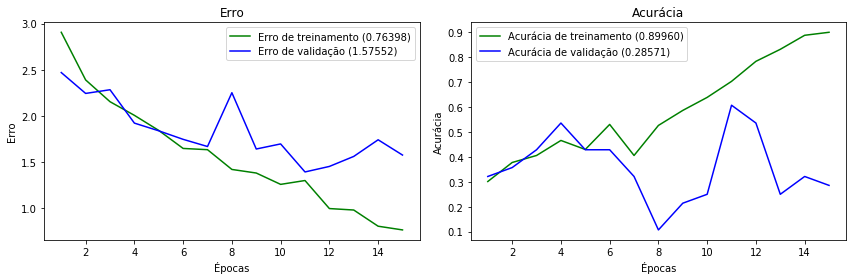

In [5]:
with open('./Reports/age/b5post_pt/histories.pkl','rb') as f:
    h = pickle.load(f)
    histories = np.array(h)
    plot_history(histories[0])
    plot_history(histories[1])
    plot_history(histories[2])

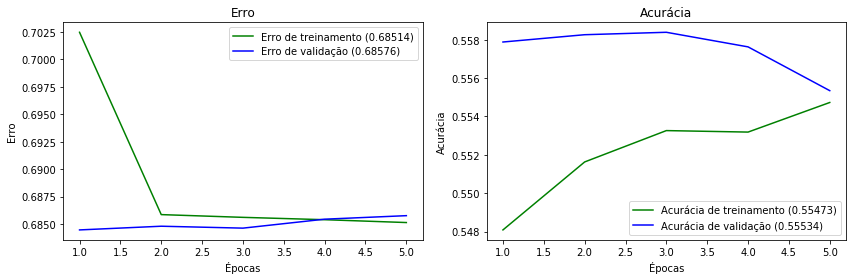

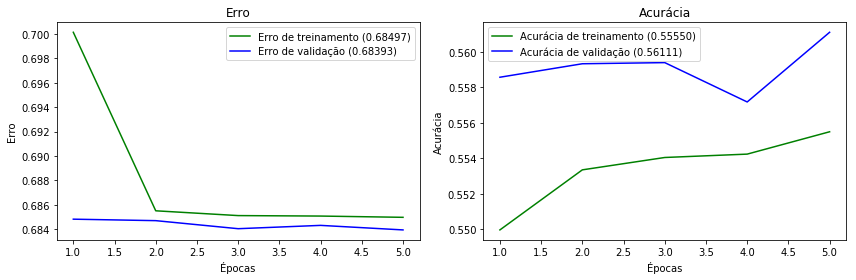

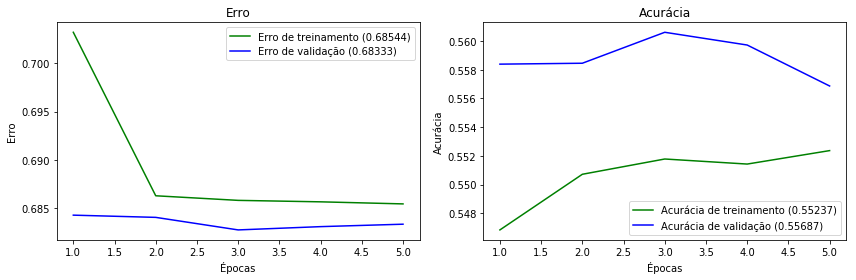

In [6]:
with open('./Reports/gender/pan13_en/histories.pkl','rb') as f:
    h = pickle.load(f)
    histories = np.array(h)
    plot_history(histories[0])
    plot_history(histories[1])
    plot_history(histories[2])

In [7]:
np.zeros(100)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
from Models.functions.datasets import loadTrainTest

In [125]:
!ls ./Grid

brmoral__grid.csv


In [128]:
import pandas as pd
import ast
def getReports(dataset_name, sort=False):
    params_keys = ['dropout_rate', 'embedding_dim', 'max_seq_length', 'strides', 'n_classes', 'features_maps', 'epochs', 'batch_size', 'max_num_words', 'kernel_size']
    def split_params(x, key):
        x = ast.literal_eval(x)
        return x[key]

    rp = pd.read_csv('./Grid/'+dataset_name+'__grid.csv')

    for p in params_keys:    
        rp[p] = rp['params'].apply( split_params, key=p)
    rp = rp.drop(['params'],axis=1)

    rp = rp.filter(['dataset','task','f1','kernel_size','features_maps','dropout_rate','strides','max_num_words','max_seq_length'])

    if sort == True:
        rp = rp.sort_values(['f1'])
    return rp

In [130]:
getReports('brmoral',sort=True)

,dataset,task,f1,kernel_size,features_maps,dropout_rate,strides,max_num_words,max_seq_length
24,brmoral,religion,0.264512,"[15, 15, 15]","[100, 100, 100]",0.5,"[1, 1, 1]",1000,302
12,brmoral,religion,0.284649,"[15, 15]","[100, 100]",0.5,"[2, 2]",20,302
15,brmoral,politics,0.290218,"[15, 15]","[100, 100]",0.5,"[2, 2]",20,302
22,brmoral,age,0.306256,"[7, 8, 9]","[100, 100, 100]",0.5,"[1, 1, 1]",1000,302
25,brmoral,religion,0.312588,"[4, 5, 6]","[100, 100, 100]",0.5,"[1, 1, 1]",1000,302
13,brmoral,education,0.331003,"[15, 15]","[100, 100]",0.5,"[2, 2]",20,302
21,brmoral,age,0.337315,"[4, 5, 6]","[100, 100, 100]",0.5,"[1, 1, 1]",1000,302
7,brmoral,age,0.359387,"[15, 15]","[600, 600]",0.5,"[1, 1, 1]",20,302
11,brmoral,age,0.372250,"[15, 15]","[100, 100]",0.5,"[2, 2]",20,302
2,brmoral,age,0.373114,"[15, 15, 15]","[50, 50, 50]",0.5,"[1, 1, 1]",20,302
